In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading dataset
df=pd.read_csv('Updated_Claimants_Dataset.csv')
df

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record
0,5,0,0.0,1.0,0.0,50.0,2367.86,Severe,4497.19,1,3221.74,Third-Party,Clean
1,3,1,1.0,0.0,0.0,18.0,3746.41,Minor,6216.38,1,6166.17,Comprehensive,Clean
2,66,1,0.0,1.0,0.0,5.0,14282.43,Severe,17978.55,0,13804.61,Comprehensive,Minor Offenses
3,70,0,0.0,1.0,1.0,31.0,519.12,Severe,753.54,1,596.25,Comprehensive,Clean
4,96,1,0.0,1.0,0.0,30.0,1354.31,Minor,2167.42,0,1714.83,Comprehensive,Clean
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,34100,1,0.0,1.0,0.0,NaN,11749.94,Moderate,14992.27,0,13533.51,Comprehensive,Clean
1336,34110,0,1.0,1.0,0.0,46.0,776.62,Moderate,1438.79,0,1178.05,Third-Party,Major Offenses
1337,34113,1,1.0,1.0,0.0,39.0,13261.20,Severe,18106.45,1,16782.44,Third-Party,Minor Offenses
1338,34145,0,1.0,0.0,0.0,8.0,9919.60,Minor,17119.15,1,14315.98,Third-Party,Clean


In [3]:
#information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CASENUM                 1340 non-null   int64  
 1   ATTORNEY                1340 non-null   int64  
 2   CLMSEX                  1328 non-null   float64
 3   CLMINSUR                1299 non-null   float64
 4   SEATBELT                1292 non-null   float64
 5   CLMAGE                  1151 non-null   float64
 6   LOSS                    1340 non-null   float64
 7   Accident_Severity       1340 non-null   object 
 8   Claim_Amount_Requested  1340 non-null   float64
 9   Claim_Approval_Status   1340 non-null   int64  
 10  Settlement_Amount       1340 non-null   float64
 11  Policy_Type             1340 non-null   object 
 12  Driving_Record          1340 non-null   object 
dtypes: float64(7), int64(3), object(3)
memory usage: 136.2+ KB


In [4]:
#describe
df.describe()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount
count,1340.000000,1340.000000,1328.000000,1299.000000,1292.000000,1151.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,11202.001493,0.488806,0.558735,0.907621,0.017028,28.414422,6684.598149,10341.430276,0.480597,8787.805463
std,9512.750796,0.500061,0.496725,0.289671,0.129425,20.304451,3785.039412,5678.906970,0.499810,4942.577454
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,296.410000,562.760000,0.000000,424.520000
25%,4177.000000,0.000000,0.000000,1.000000,0.000000,9.000000,3414.052500,5308.890000,0.000000,4389.100000
50%,8756.500000,0.000000,1.000000,1.000000,0.000000,30.000000,6781.575000,10571.250000,0.000000,8898.245000
75%,15702.500000,1.000000,1.000000,1.000000,0.000000,43.000000,9708.882500,15291.665000,1.000000,12646.157500
max,34153.000000,1.000000,1.000000,1.000000,1.000000,95.000000,15794.810000,19988.570000,1.000000,19566.510000


In [5]:
#Null values check
df.isnull().sum()

,0
CASENUM,0
ATTORNEY,0
CLMSEX,12
CLMINSUR,41
SEATBELT,48
CLMAGE,189
LOSS,0
Accident_Severity,0
Claim_Amount_Requested,0
Claim_Approval_Status,0


In [6]:
#filling null values with median
for col in ['CLMSEX', 'CLMINSUR', 'SEATBELT', 'CLMAGE']:
    df[col] = df[col].fillna(df[col].median())

In [7]:
#duplicates
df.duplicated().sum()

0

In [8]:
#unique length of all columns

for col in df.columns:
  print(f'Column {col}: {len(df[col].unique())}')

Column CASENUM: 1283
Column ATTORNEY: 2
Column CLMSEX: 2
Column CLMINSUR: 2
Column SEATBELT: 2
Column CLMAGE: 68
Column LOSS: 1340
Column Accident_Severity: 3
Column Claim_Amount_Requested: 1340
Column Claim_Approval_Status: 2
Column Settlement_Amount: 1340
Column Policy_Type: 2
Column Driving_Record: 3


In [9]:
#Drop CASENUM from the dataset
#Doesn't contain any meaningful information
df1=df.copy()
df1 = df1.drop(columns=['CASENUM'])

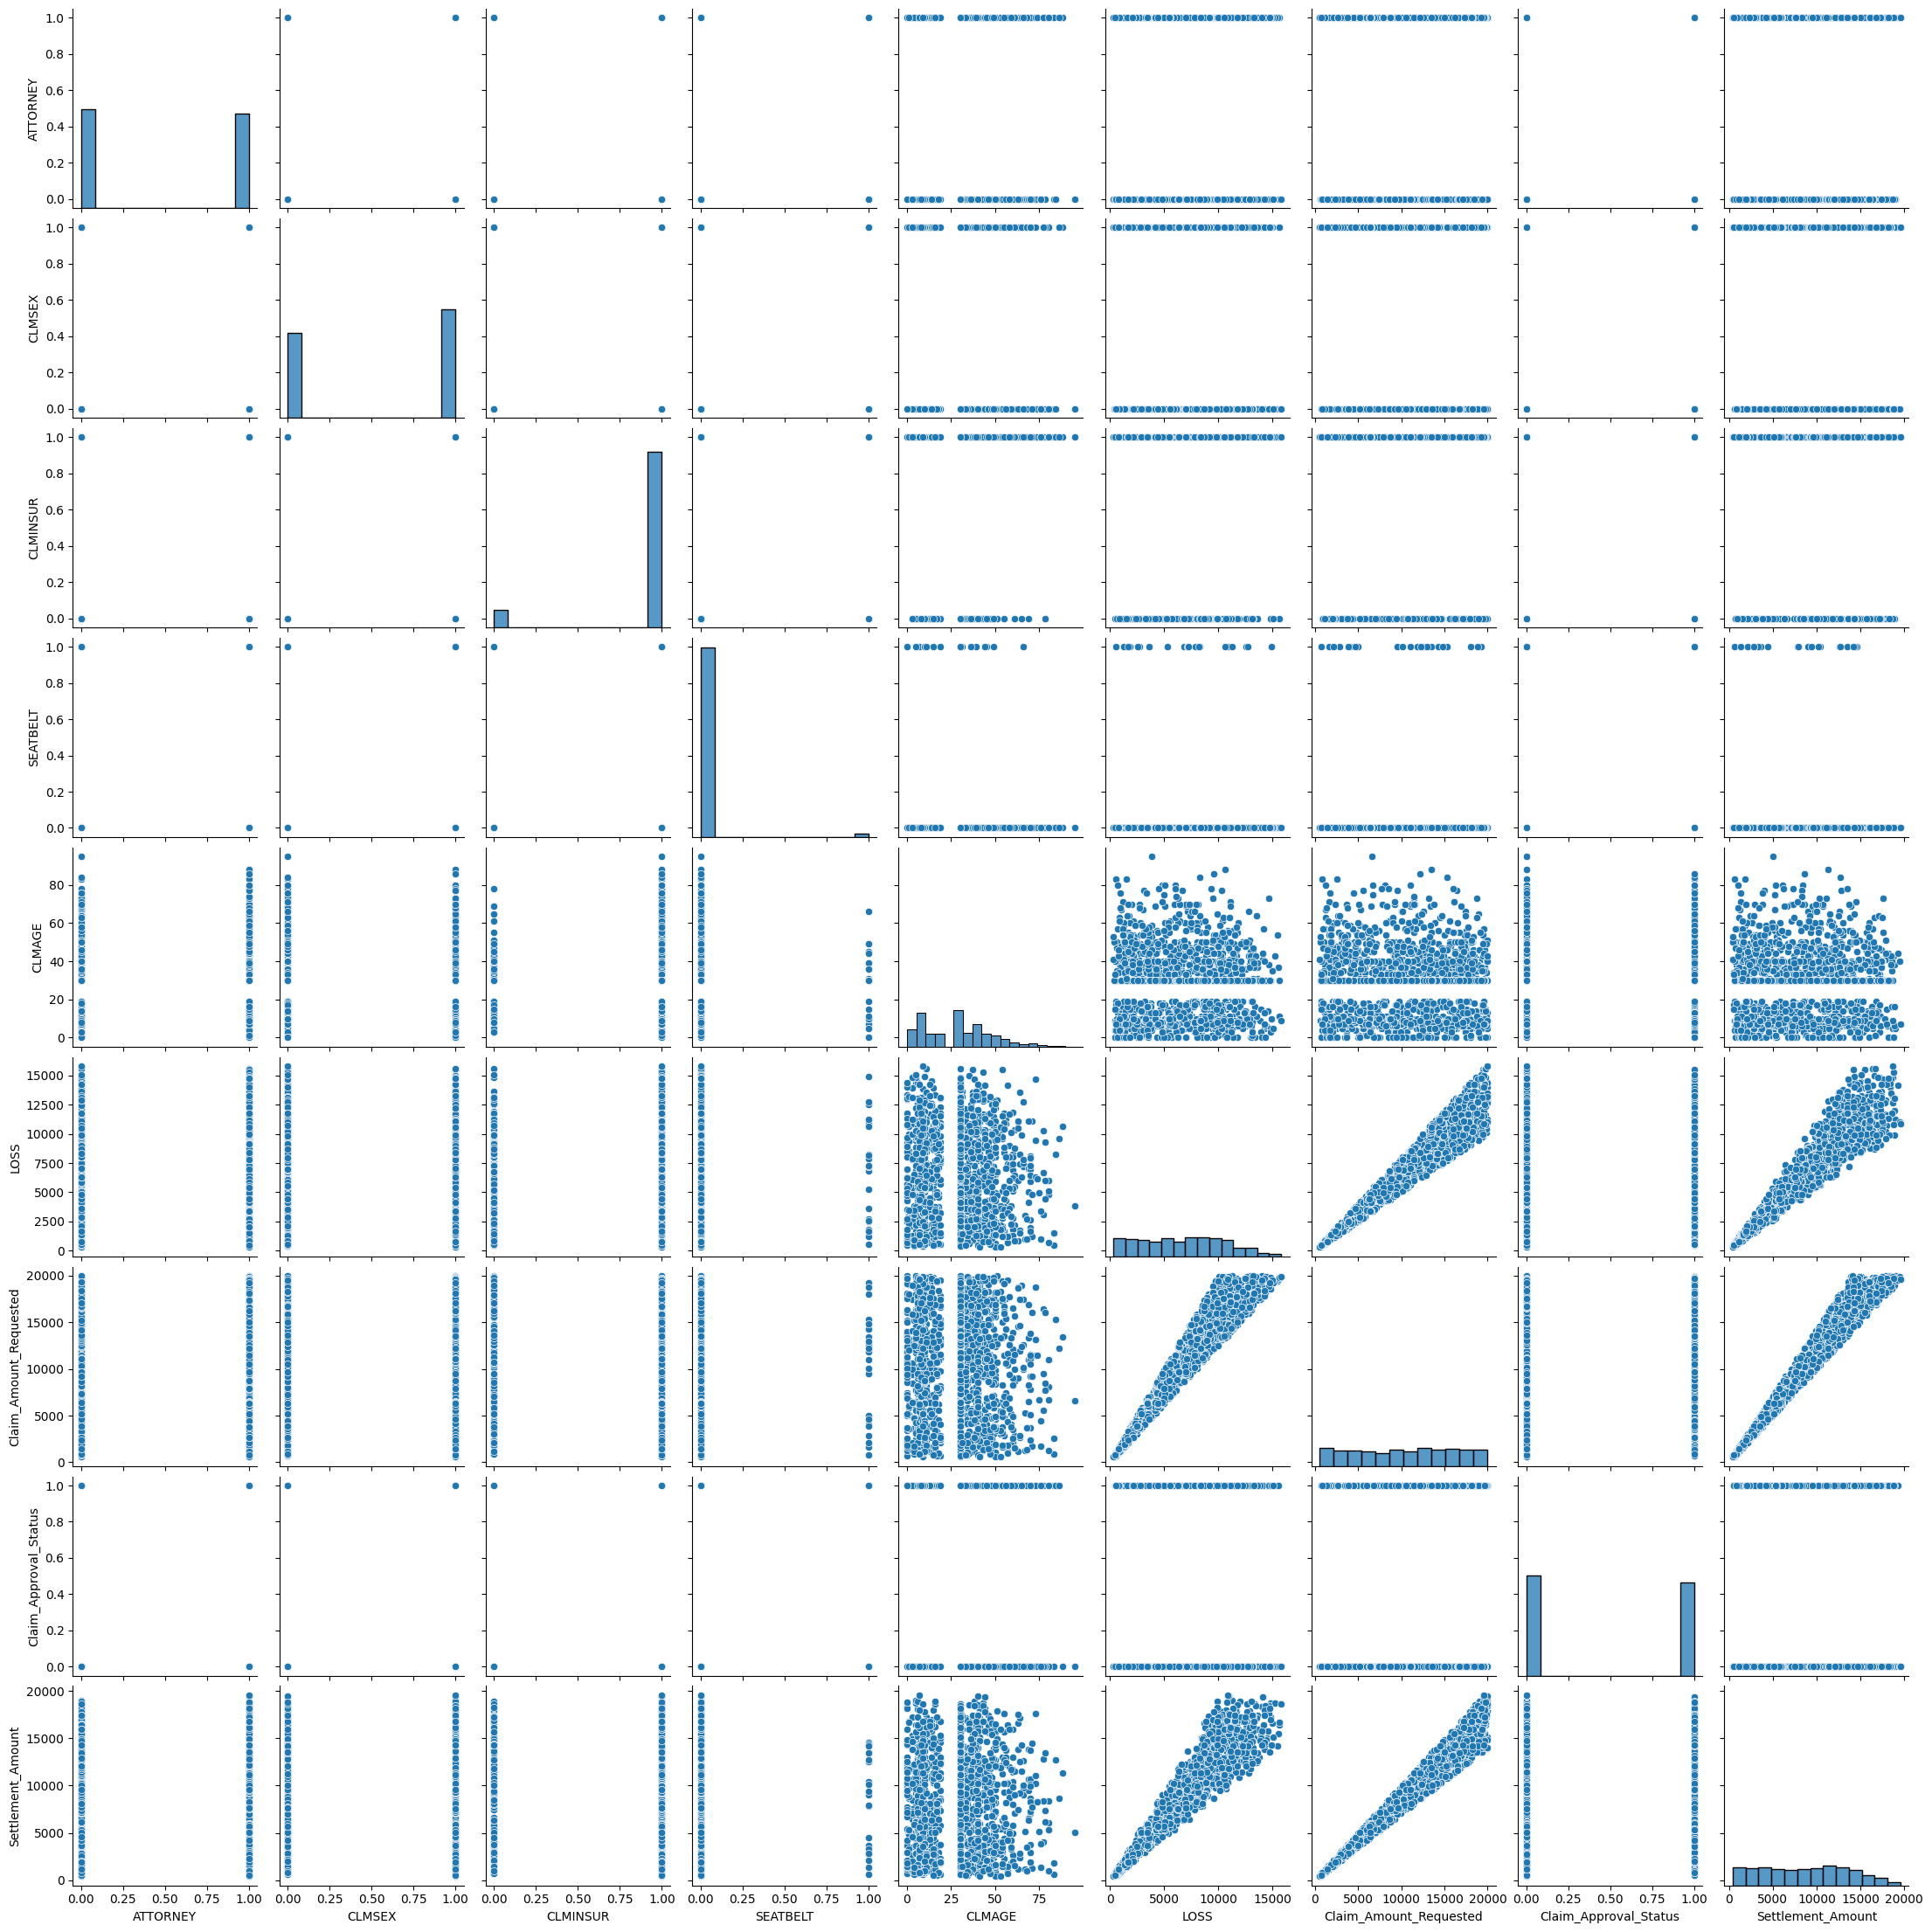

In [10]:
# Create the pairplot

sns.pairplot(df1)
plt.show()

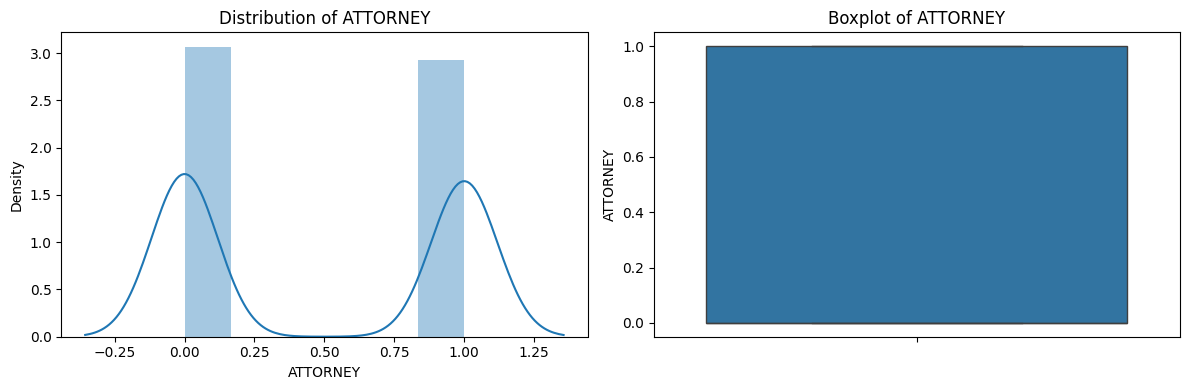

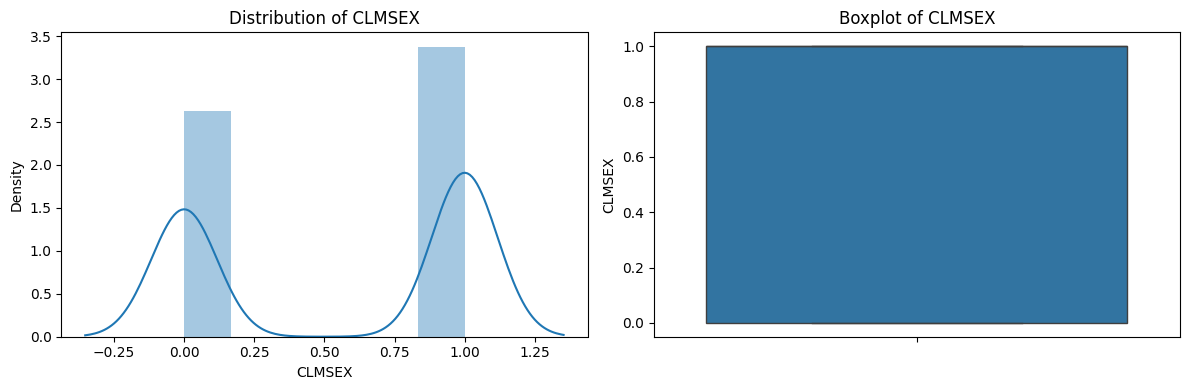

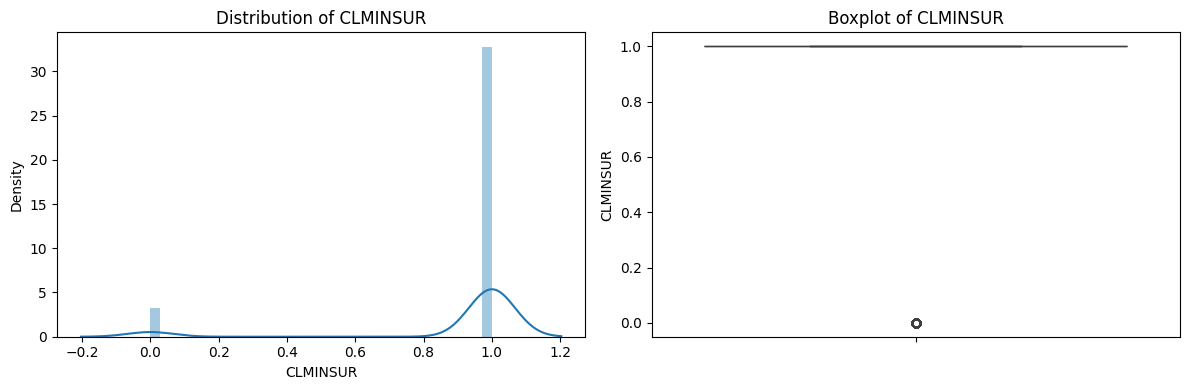

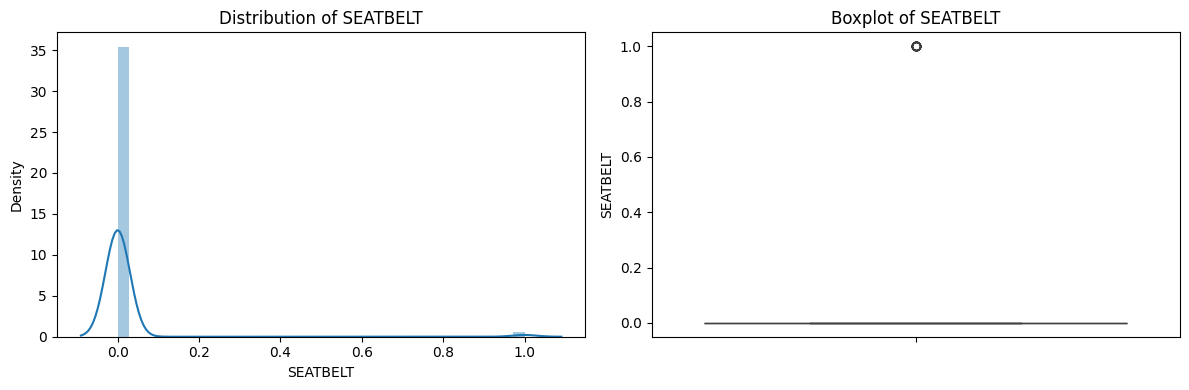

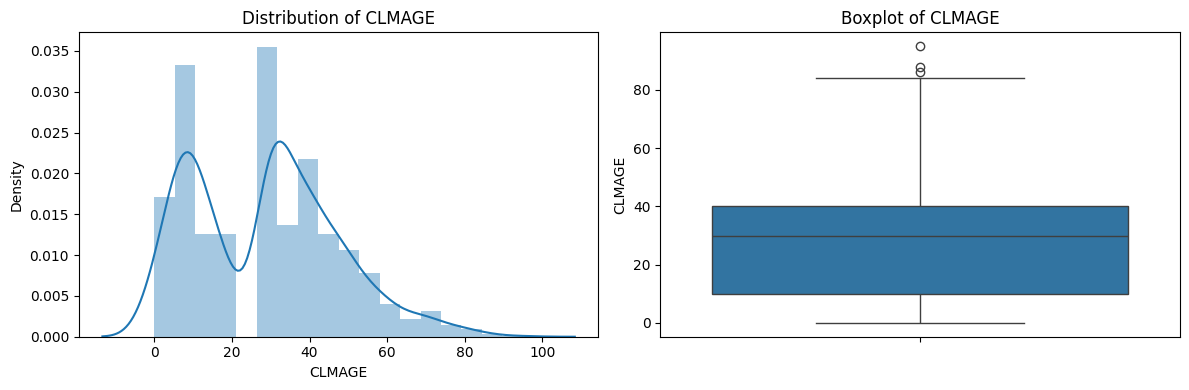

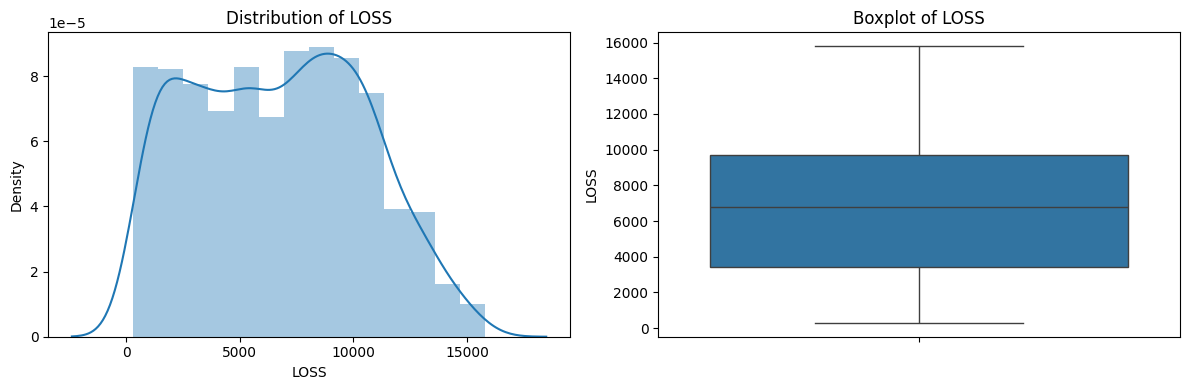

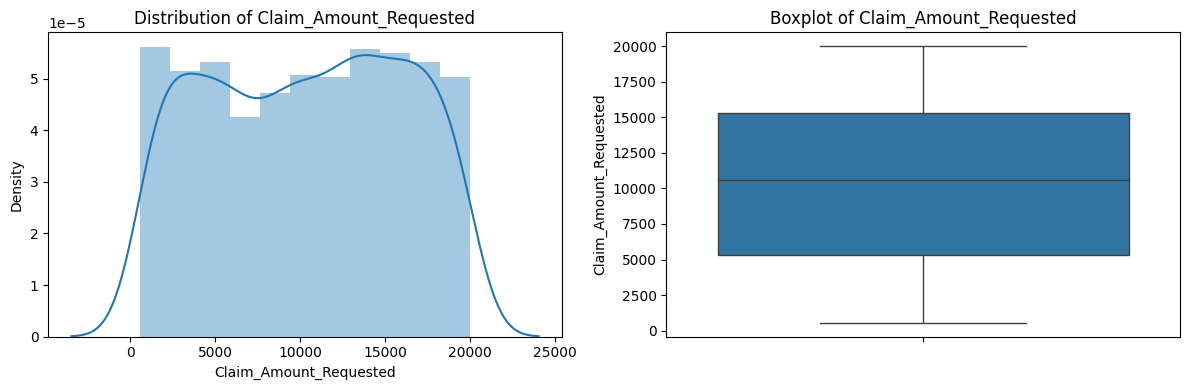

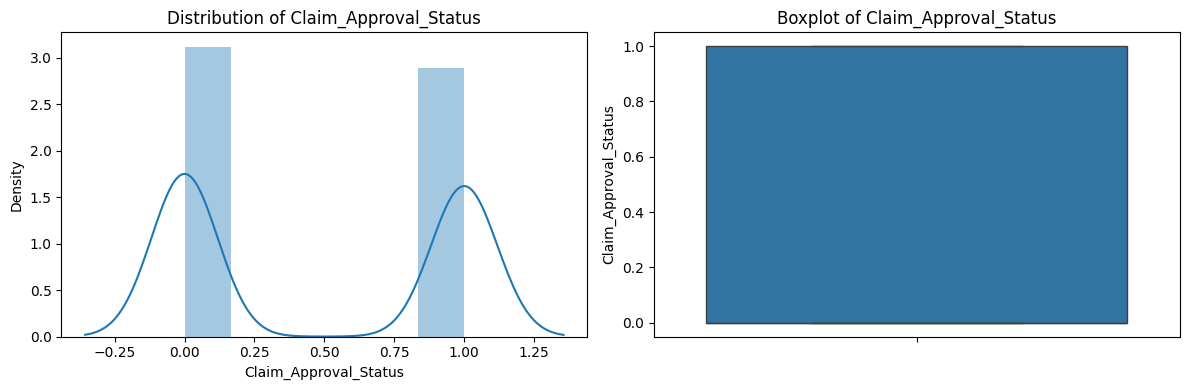

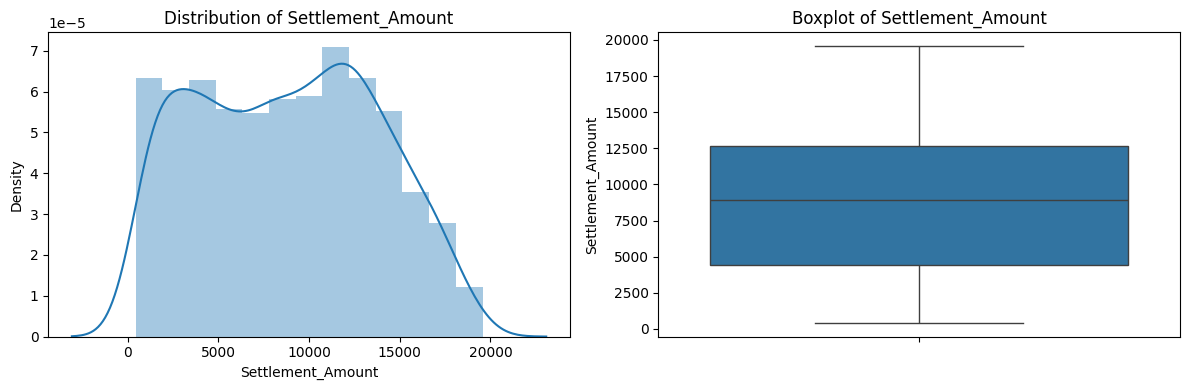

In [11]:
# distplot and box plot of all numerical columns

# numerical columns
numerical_cols = df1.select_dtypes(include=np.number).columns

# distplot and boxplot for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(12, 4))

    # distplot
    plt.subplot(1, 2, 1)
    sns.distplot(df1[col])
    plt.title(f'Distribution of {col}')

    # boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df1[col])
    plt.title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()

In [12]:
# removing outliers from clamage column

def remove_outliers_iqr(df1, column):
    Q1 = df1[column].quantile(0.25)
    Q3 = df1[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_no_outliers = df1[(df1[column] >= lower_bound) & (df1[column] <= upper_bound)]
    return df_no_outliers

df1 = remove_outliers_iqr(df1, 'CLMAGE')
df1.reset_index(drop=True, inplace=True)
print('old dataset = ',df.shape)
print('new dataset = ',df1.shape)

old dataset =  (1340, 13)
new dataset =  (1337, 12)


In [13]:
# categorical columns
df1.select_dtypes(exclude=np.number).columns

Index(['Accident_Severity', 'Policy_Type', 'Driving_Record'], dtype='object')

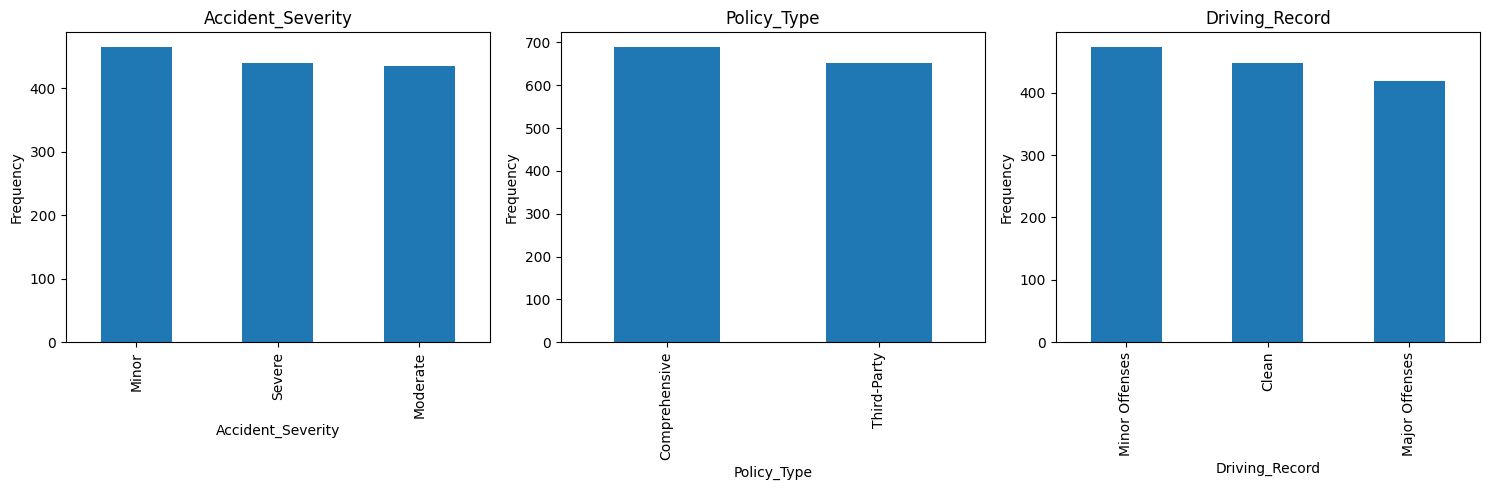

In [14]:
#histogram of categorical columns
# List of columns to plot histograms for
columns_to_plot = ['Accident_Severity', 'Policy_Type', 'Driving_Record']

# Set up the plot
plt.figure(figsize=(15, 5))

# Iterate through columns and plot histograms
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(1, len(columns_to_plot), i)
    df[column].value_counts().plot(kind='bar')
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [15]:
# Dummy variables for the 'Policy_Type' column as it is Nominal
df_dummies = pd.get_dummies(df1[['Policy_Type']], dtype=int)

# Concatenate the dummy variables with the original DataFrame
df1 = pd.concat([df1.drop(columns=['Policy_Type']), df_dummies], axis=1)
df1

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Driving_Record,Policy_Type_Comprehensive,Policy_Type_Third-Party
0,0,0.0,1.0,0.0,50.0,2367.86,Severe,4497.19,1,3221.74,Clean,0,1
1,1,1.0,0.0,0.0,18.0,3746.41,Minor,6216.38,1,6166.17,Clean,1,0
2,1,0.0,1.0,0.0,5.0,14282.43,Severe,17978.55,0,13804.61,Minor Offenses,1,0
3,0,0.0,1.0,1.0,31.0,519.12,Severe,753.54,1,596.25,Clean,1,0
4,1,0.0,1.0,0.0,30.0,1354.31,Minor,2167.42,0,1714.83,Clean,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,1,0.0,1.0,0.0,30.0,11749.94,Moderate,14992.27,0,13533.51,Clean,1,0
1333,0,1.0,1.0,0.0,46.0,776.62,Moderate,1438.79,0,1178.05,Major Offenses,0,1
1334,1,1.0,1.0,0.0,39.0,13261.20,Severe,18106.45,1,16782.44,Minor Offenses,0,1
1335,0,1.0,0.0,0.0,8.0,9919.60,Minor,17119.15,1,14315.98,Clean,0,1


In [16]:
#Label encoding 'Accident_Severity' and 'Driving_Record' column as they are Ordinal
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

#Accident Severity (Minor=0 < Moderate=1 < Severe=2)
df1['Accident_Severity'] = label_encoder.fit_transform(df1['Accident_Severity'])

# Custom mapping for 'Driving_Record'
driving_record_mapping = {'Clean': 0, 'Minor Offenses': 1, 'Major Offenses': 2}
# Apply the mapping
df1['Driving_Record'] = df1['Driving_Record'].map(driving_record_mapping)

df1

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Driving_Record,Policy_Type_Comprehensive,Policy_Type_Third-Party
0,0,0.0,1.0,0.0,50.0,2367.86,2,4497.19,1,3221.74,0,0,1
1,1,1.0,0.0,0.0,18.0,3746.41,0,6216.38,1,6166.17,0,1,0
2,1,0.0,1.0,0.0,5.0,14282.43,2,17978.55,0,13804.61,1,1,0
3,0,0.0,1.0,1.0,31.0,519.12,2,753.54,1,596.25,0,1,0
4,1,0.0,1.0,0.0,30.0,1354.31,0,2167.42,0,1714.83,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,1,0.0,1.0,0.0,30.0,11749.94,1,14992.27,0,13533.51,0,1,0
1333,0,1.0,1.0,0.0,46.0,776.62,1,1438.79,0,1178.05,2,0,1
1334,1,1.0,1.0,0.0,39.0,13261.20,2,18106.45,1,16782.44,1,0,1
1335,0,1.0,0.0,0.0,8.0,9919.60,0,17119.15,1,14315.98,0,0,1


In [17]:
#Standardization
from sklearn.preprocessing import StandardScaler

# Identify numerical columns to standardize
columns_to_standardize = ['CLMAGE', 'LOSS', 'Claim_Amount_Requested', 'Settlement_Amount']

# Standardize the selected columns
scaler = StandardScaler()
# Fit and transform on df1, which has the reduced number of rows after outlier removal
df1[columns_to_standardize] = scaler.fit_transform(df1[columns_to_standardize])
df1

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Driving_Record,Policy_Type_Comprehensive,Policy_Type_Third-Party
0,0,0.0,1.0,0.0,1.154945,-1.139795,2,-1.028515,1,-1.125874,0,0,1
1,1,1.0,0.0,0.0,-0.564133,-0.775550,0,-0.725913,1,-0.530403,0,1,0
2,1,0.0,1.0,0.0,-1.262508,2.008308,2,1.344398,0,1.014367,1,1,0
3,0,0.0,1.0,1.0,0.134243,-1.628274,2,-1.687451,1,-1.656844,0,1,0
4,1,0.0,1.0,0.0,0.080522,-1.407598,0,-1.438588,0,-1.430626,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,1,0.0,1.0,0.0,0.080522,1.339166,1,0.818769,0,0.959540,0,1,0
1333,0,1.0,1.0,0.0,0.940061,-1.560237,1,-1.566837,0,-1.539183,2,0,1
1334,1,1.0,1.0,0.0,0.564012,1.738476,2,1.366910,1,1.616592,1,0,1
1335,0,1.0,0.0,0.0,-1.101345,0.855548,0,1.193131,1,1.117784,0,0,1


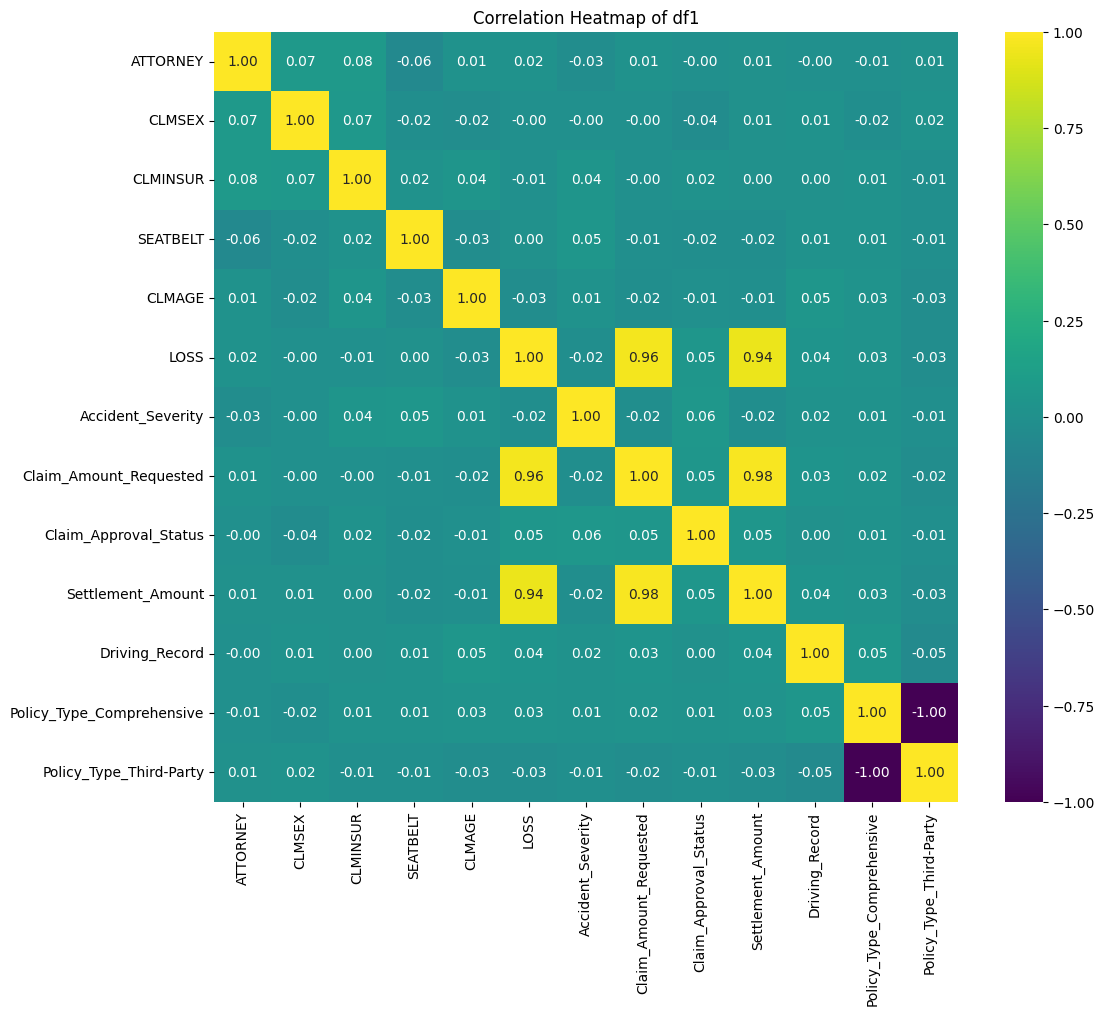

In [18]:
# Calculate the correlation matrix
correlation_matrix = df1.corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Heatmap of df1')
plt.show()

In [19]:
#Copying dataset
df2=df1.copy()

In [20]:
# calculate vif of all columns
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = df2.columns
vif_data["VIF"] = [variance_inflation_factor(df2.values, i) for i in range(len(df2.columns))]

vif_data

,feature,VIF
0,ATTORNEY,1.017412
1,CLMSEX,1.013643
2,CLMINSUR,1.015795
3,SEATBELT,1.010443
4,CLMAGE,1.009053
5,LOSS,13.298193
6,Accident_Severity,1.011297
7,Claim_Amount_Requested,36.630563
8,Claim_Approval_Status,1.009321
9,Settlement_Amount,24.233630


In [21]:
# Creating a new feature by summing 'Claim_Amount_Requested' and 'Settlement_Amount'
df2['Claim_Settlement_Total'] = df2['Claim_Amount_Requested'] / df2['Settlement_Amount']

# Drop the original columns to avoid redundancy
df2 = df2.drop(columns=['Claim_Amount_Requested', 'Settlement_Amount'])

In [22]:
# calculate vif of all columns
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = df2.columns
vif_data["VIF"] = [variance_inflation_factor(df2.values, i) for i in range(len(df2.columns))]

vif_data

,feature,VIF
0,ATTORNEY,1.016247
1,CLMSEX,1.012674
2,CLMINSUR,1.015262
3,SEATBELT,1.008289
4,CLMAGE,1.007989
5,LOSS,1.007337
6,Accident_Severity,1.010752
7,Claim_Approval_Status,1.009170
8,Driving_Record,1.009634
9,Policy_Type_Comprehensive,8.856087


In [23]:
#  drop column Policy_Type_Third-Party
df2 = df2.drop(columns=['Policy_Type_Third-Party'])
'''
if Policy_Type is Comprehensive = 1, else = 0
'''

'\nif Policy_Type is Comprehensive = 1, else = 0\n'

In [24]:
# calculate vif of all columns
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = df2.columns
vif_data["VIF"] = [variance_inflation_factor(df2.values, i) for i in range(len(df2.columns))]

vif_data

,feature,VIF
0,ATTORNEY,1.927696
1,CLMSEX,2.197952
2,CLMINSUR,5.364077
3,SEATBELT,1.024988
4,CLMAGE,1.005331
5,LOSS,1.006567
6,Accident_Severity,2.315066
7,Claim_Approval_Status,1.857523
8,Driving_Record,2.315097
9,Policy_Type_Comprehensive,1.963049


In [25]:
#Final dataframe
dff=df2.copy()
dff

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Approval_Status,Driving_Record,Policy_Type_Comprehensive,Claim_Settlement_Total
0,0,0.0,1.0,0.0,1.154945,-1.139795,2,1,0,0,0.913526
1,1,1.0,0.0,0.0,-0.564133,-0.775550,0,1,0,1,1.368605
2,1,0.0,1.0,0.0,-1.262508,2.008308,2,0,1,1,1.325357
3,0,0.0,1.0,1.0,0.134243,-1.628274,2,1,0,1,1.018473
4,1,0.0,1.0,0.0,0.080522,-1.407598,0,0,0,1,1.005565
...,...,...,...,...,...,...,...,...,...,...,...
1332,1,0.0,1.0,0.0,0.080522,1.339166,1,0,0,1,0.853293
1333,0,1.0,1.0,0.0,0.940061,-1.560237,1,0,2,0,1.017967
1334,1,1.0,1.0,0.0,0.564012,1.738476,2,1,1,0,0.845550
1335,0,1.0,0.0,0.0,-1.101345,0.855548,0,1,0,0,1.067407


In [26]:
#Summary
'''
1.importing libraries
2.loading dataset
3.info and describe
4.handled null values
5.no duplicates found
6.dropped non meaningful columns (CASENUM)
7.visualization : Pairplot, Distplot, Boxplot
8.removing outliers
9.one hot encoding and label encoding on categorial columns
10.standardization
11.correlation heatmap
12.Variance Inflation Factor is good to go.

Final dataframe: dff
'''

'\n1.importing libraries\n2.loading dataset\n3.info and describe\n4.handled null values\n5.no duplicates found\n6.dropped non meaningful columns (CASENUM)\n7.visualization : Pairplot, Distplot, Boxplot\n8.removing outliers\n9.one hot encoding and label encoding on categorial columns\n10.standardization\n11.correlation heatmap\n12.Variance Inflation Factor is good to go.\n\nFinal dataframe: dff\n'